# About the Data:

This dataset is having a details of individiuals in terms of their Taxable income, education, Martial status etc. The data is having 600 rows & 6 colums.



# Problem Statement :
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

According to problem statement, we make an assumptions that those individuals whose tax_income is lesser or equal to 30000 will be treated as a risky for the firm/bank. First will do EDA, correlation check of features,Feature engineering,normalization, model creation & predications with accuracy check.

In [233]:
# Import Liabraries
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [169]:
fraud=pd.read_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/Dec_Tree/Fraud_check.csv')

In [170]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [171]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [172]:
fraud.shape

(600, 6)

In [173]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [174]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [175]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [176]:
fraud['Taxable.Income'].value_counts()

59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64

<AxesSubplot:ylabel='Frequency'>

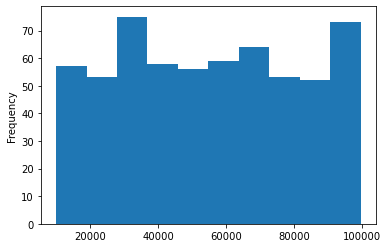

In [177]:
fraud['Taxable.Income'].plot(kind='hist')

In [178]:
fraud[fraud.duplicated()].shape

(0, 6)

# Correlation

In [179]:
corr=fraud.corr()
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


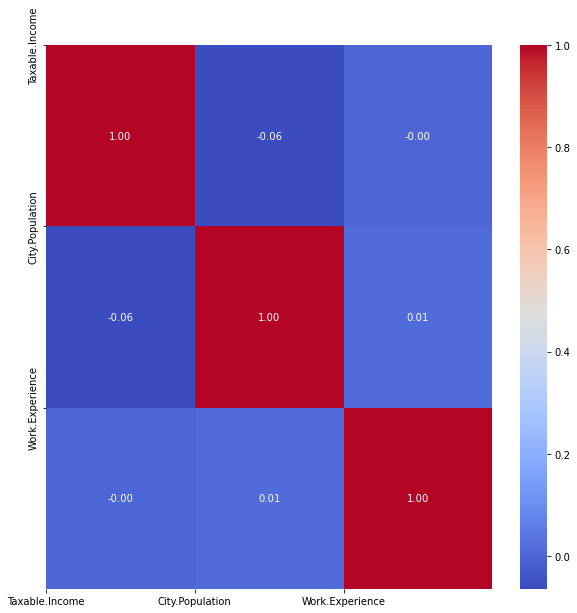

In [180]:
# visualize Correlations
corr=fraud.corr()
fig,ax=plt.subplots(figsize=(10,10))

sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f")
plt.xticks(range(len(corr.columns)),corr.columns);
plt.yticks(range(len(corr.columns)),corr.columns)

plt.show()

<AxesSubplot:xlabel='City.Population', ylabel='Work.Experience'>

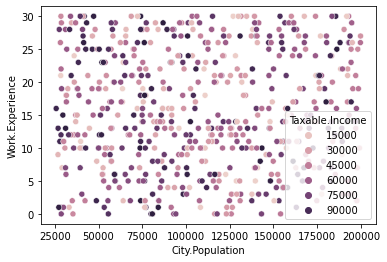

In [181]:
sns.scatterplot(fraud['City.Population'],fraud['Work.Experience'],hue=fraud['Taxable.Income'])

# Feature engineering

Making dummy variable & droping the first.

In [182]:
df=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status', 'Urban'], drop_first=True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable.Income          600 non-null    int64
 1   City.Population         600 non-null    int64
 2   Work.Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital.Status_Married  600 non-null    uint8
 5   Marital.Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 16.5 KB


In [184]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])


In [185]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


Paramenter -: Taxble Income<=30000 as "Risky=0" & Others "Good=1"

In [186]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [187]:
df.head(15)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,0,0,0,1,1
7,62774,131253,3,1,0,1,1,1
8,83519,102481,12,0,0,1,1,1
9,98152,155482,4,1,0,0,1,1


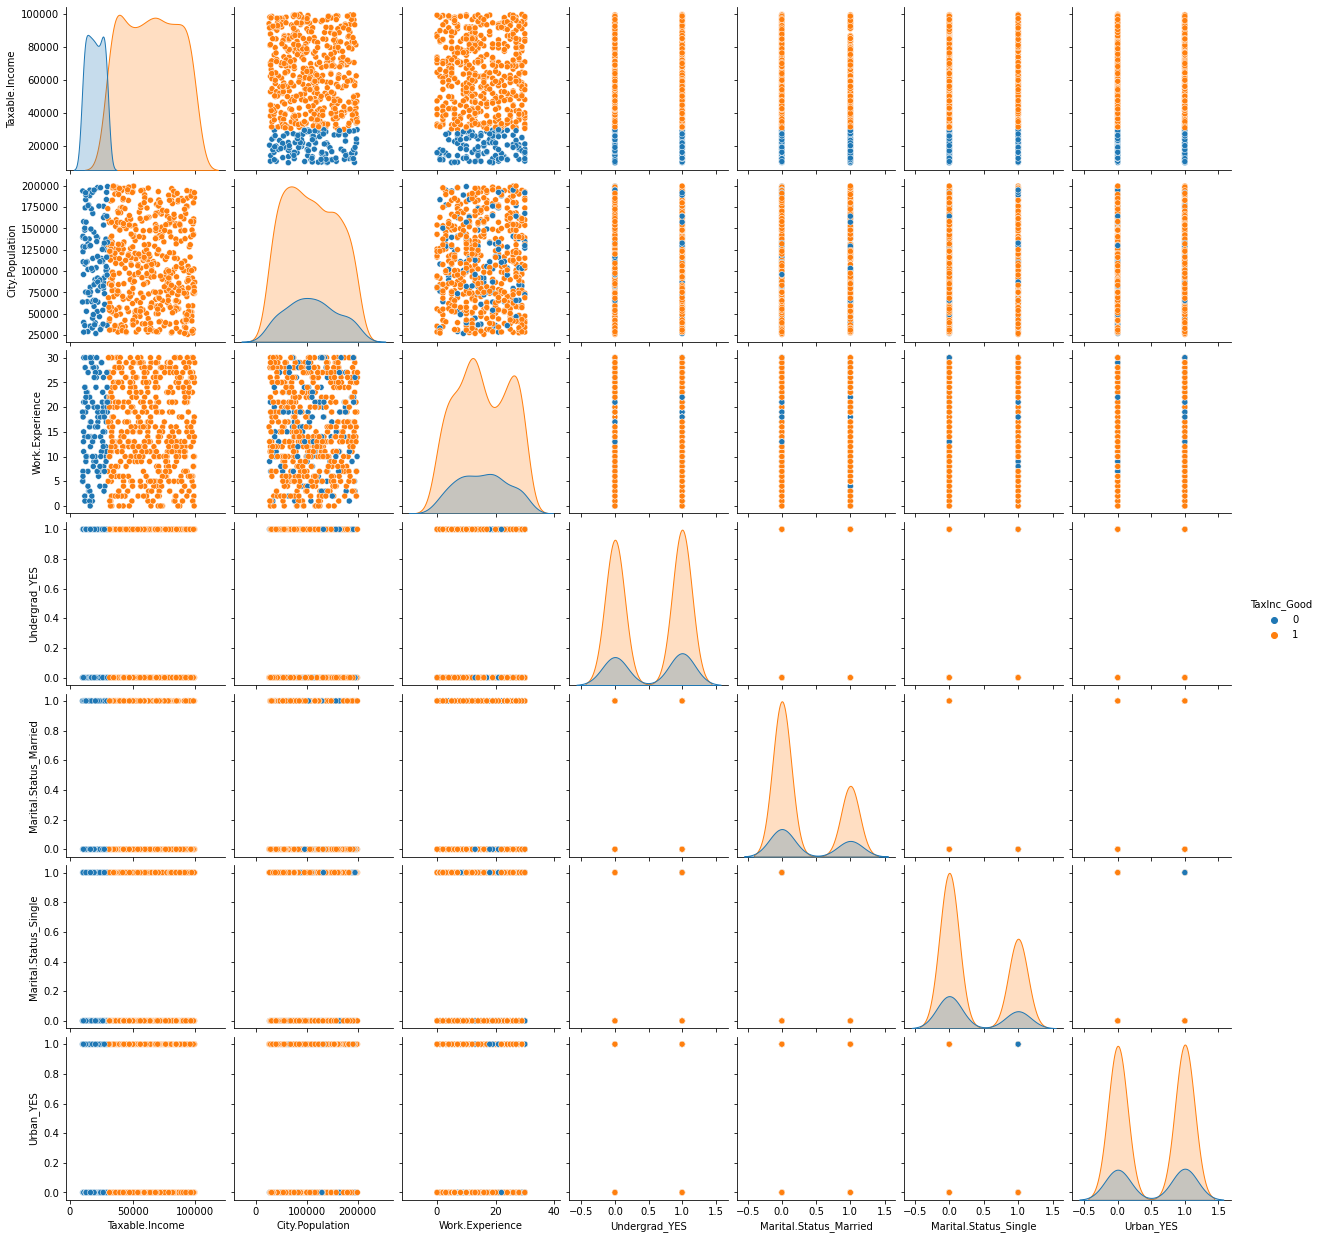

In [188]:
sns.pairplot(data=df,hue='TaxInc_Good')

# Normalization

In [190]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [191]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.head(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
5,0.520710,0.000000,0.0,0.0,0.0,0.0,1.0
6,0.316732,0.266667,0.0,0.0,0.0,1.0,1.0
7,0.606176,0.100000,1.0,0.0,1.0,1.0,1.0
8,0.440819,0.400000,0.0,0.0,1.0,1.0,1.0
9,0.745424,0.133333,1.0,0.0,0.0,1.0,1.0


In [192]:
X = df_norm.iloc[:,0:6]
y = df_norm['TaxInc_Good']

In [193]:
X.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [194]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [195]:
y.unique()

array([1., 0.])

In [196]:
y.value_counts()

1.0    476
0.0    124
Name: TaxInc_Good, dtype: int64

# Splitting x & y into training and test dataset

In [197]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [198]:
# Prepare the Taxable income variable into 3 variables. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [199]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [200]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"Exp"}, inplace=True)}

SyntaxError: unmatched '}' (4147055488.py, line 1)

In [201]:
df.rename(columns={'City.Population':'population','Work.Experience':'Exp'}, inplace=True)

In [202]:
df

,population,Exp,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [203]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [204]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [205]:
features

,population,Exp,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,50047,10,0,0,1
1,134075,18,1,0,0
2,160205,30,0,1,0
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,0
596,55369,2,1,0,0
597,154058,0,0,0,0
598,180083,17,1,1,0


In [206]:
labels

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban_YES, Length: 600, dtype: uint8

In [207]:
## column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

# Splitting the data into train and test again for new dataframe.

In [209]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

# Create Model

Random forest

In [210]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [211]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [212]:
model.n_outputs_

1

In [213]:
model.oob_score_

0.49375

In [214]:
##Predictions on train data
prediction = model.predict(x_train)
prediction

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

# Accuracy

In [215]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [216]:
np.mean(prediction==y_train)

0.9854166666666667

In [217]:
# Confusion Matrix

In [218]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [219]:
pred_test=model.predict(x_test)

In [220]:
#Accuracy Score
accuracy=accuracy_score(y_test,pred_test)
accuracy

0.49166666666666664

In [221]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus

from six import StringIO

In [222]:
tree=model.estimators_[5]

In [223]:
dot_data=StringIO()

In [224]:
export_graphviz(tree,out_file=dot_data,filled=True,rounded=True,feature_names=predictors,class_names=target)

In [225]:
Graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Graph

# Building Decision Tree Classifier using Entropy Criteria

In [226]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

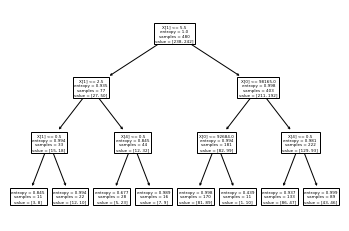

In [231]:
tree.plot_tree(model);

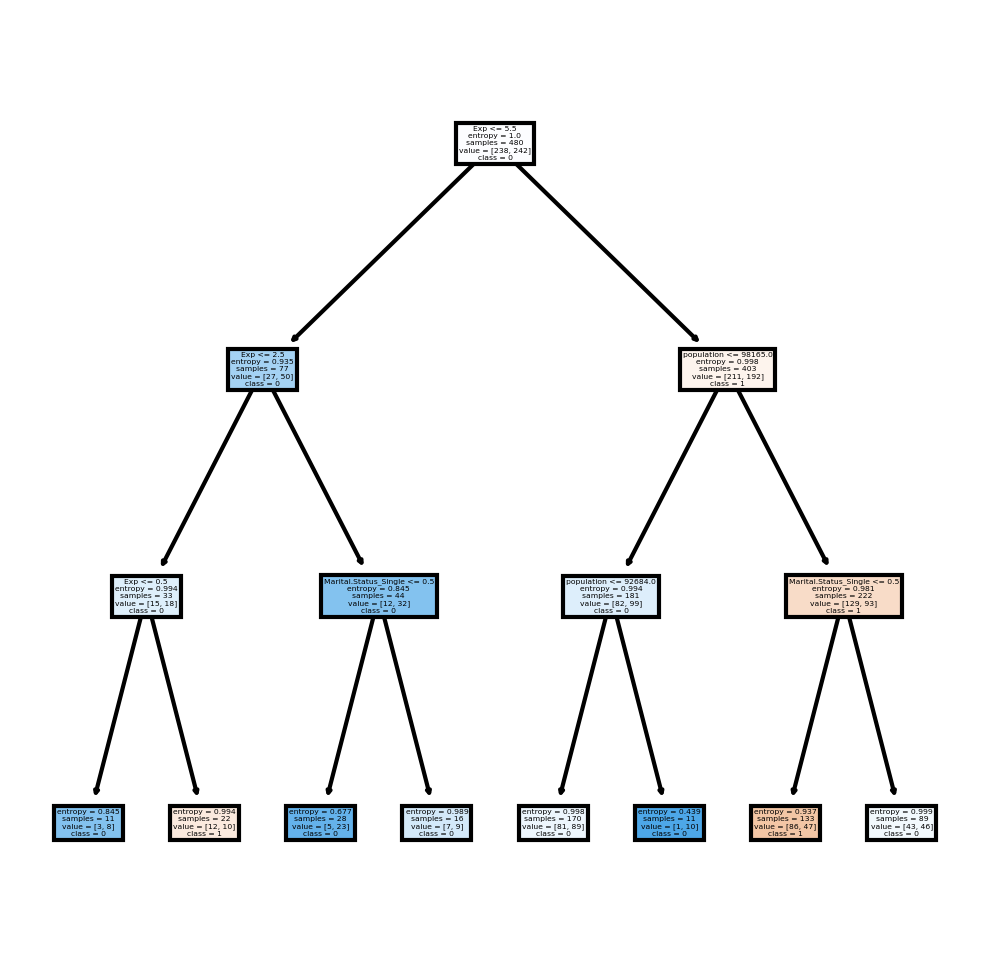

In [232]:
fn=['population','Exp','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Prediction

In [150]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    90
1    30
dtype: int64

In [151]:
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=uint8)

In [152]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,45,15
1,45,15


# Accuracy score

In [153]:
np.mean(preds==y_test)

0.5

In [154]:
preds==y_test

498    False
122     True
204     True
177    False
16      True
       ...  
194     True
47     False
409    False
284    False
188     True
Name: Urban_YES, Length: 120, dtype: bool

# Building Decision Tree Classifier (CART) using Gini Criteria

In [155]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [156]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [157]:
#Prediction and computing the accuracy on testdata
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5

Decision Tree Regression Example

In [158]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [161]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [162]:
# Accuracy Score
model.score(X_test,y_test)

-1.017089228183219